In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
data = pd.read_csv("03 - bicycles hour.csv")

In [23]:
data

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  casual      17379 non-null  int64  
 13  registered  17379 non-null  int64  
 14  cnt         17379 non-null  int64  
dtypes: float64(3), int64(11), object(1)
memory usage: 1.9+ MB


In [24]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [74]:
data.drop(['instant', 'atemp', 'dteday'], axis=1, inplace=True)

It looks like when temperature is between 10-30, we have got more bicycles. This makes sense as people do not want to go out in more warm or cold weather

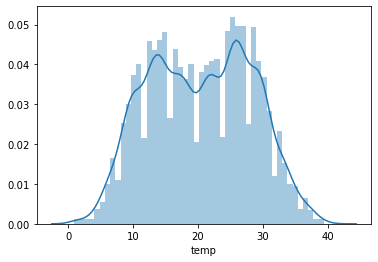

In [75]:
sns.distplot(data['temp']*41, bins=50)

It looks like all seasons have same amount of bicycles

In [76]:
data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

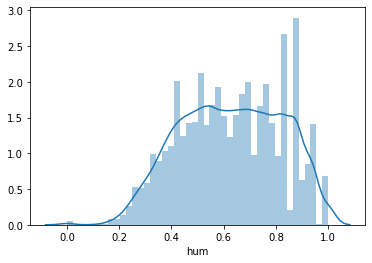

In [77]:
sns.distplot(data['hum'])

In [78]:
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,2011
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,2011
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32,2011
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0,3,10,13,2011
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0,0,1,1,2011


We have got more bicycles in non-holidays. In other words, we have got more non-holidays. Which have reduced the number of bicycles. On the other hand, if we take mean, we will see that we have got almost equal number of bicycles 

In [79]:
print(data.groupby('holiday').sum()['cnt'],'\n==============')
print(data.groupby('holiday').mean()['cnt'])

holiday
0    3214244
1      78435
Name: cnt, dtype: int64 
holiday
0    190.42858
1    156.87000
Name: cnt, dtype: float64


In [80]:
# we have got almost same number of bikes in all months
data['mnth'].value_counts().sort_index()

1     1429
2     1341
3     1473
4     1437
5     1488
6     1440
7     1488
8     1475
9     1437
10    1451
11    1437
12    1483
Name: mnth, dtype: int64

In [81]:
data['weekday'].value_counts().sort_index()

0    2502
1    2479
2    2453
3    2475
4    2471
5    2487
6    2512
Name: weekday, dtype: int64

In [82]:
data.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,2011
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,2011
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32,2011


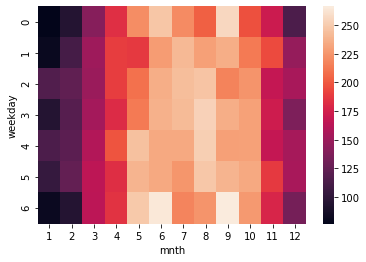

In [88]:
sns.heatmap(data.pivot_table(values='cnt', index='weekday', columns='mnth'))

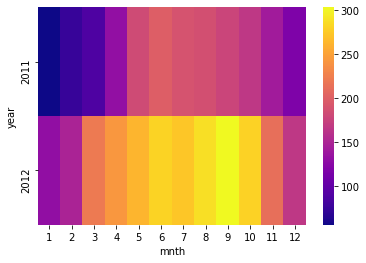

In [93]:
sns.heatmap(data.pivot_table(values='cnt', index='year', columns='mnth'), cmap='plasma')

In [106]:
data.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,year
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0,3,13,16,2011
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0,8,32,40,2011
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0,5,27,32,2011


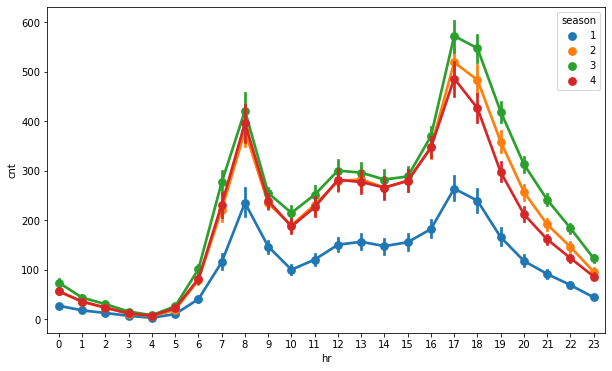

In [141]:
# season wise hourly distribution
plt.figure(figsize=(10,6))
sns.pointplot(data=data[['yr','hr', 'cnt']],x='hr',y='cnt', hue=data['season'])

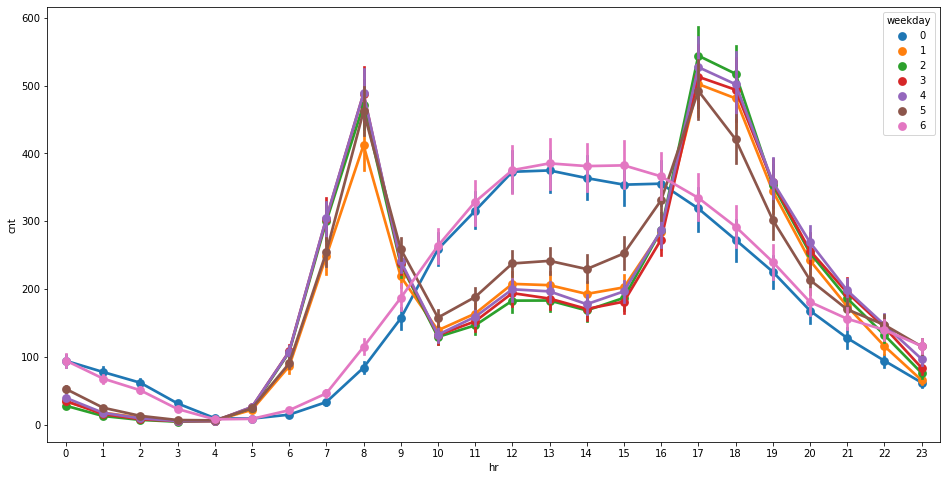

In [145]:
# day wise hourly distribution
plt.figure(figsize=(16,8))
sns.pointplot(data=data[['yr','hr', 'cnt']],x='hr',y='cnt', hue=data['weekday'],linestyles='-')

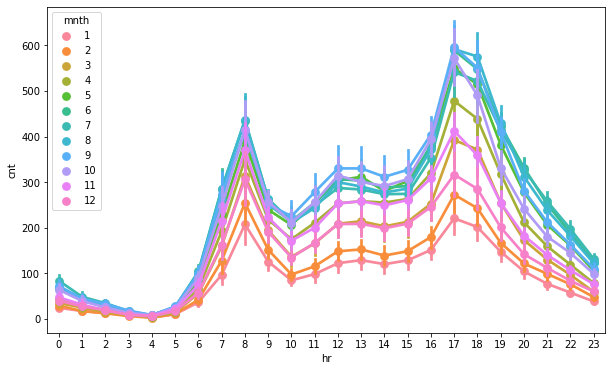

In [149]:
# month wise hourly distribution
plt.figure(figsize=(10,6))
sns.pointplot(data=data[['hr', 'cnt']],x='hr',y='cnt', hue=data['mnth'])

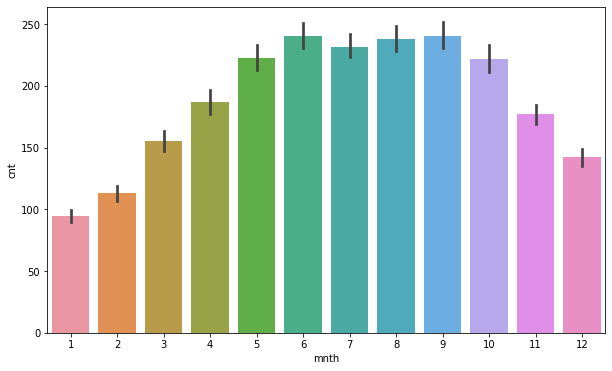

In [152]:
# month wise hourly distribution
plt.figure(figsize=(10,6))
sns.barplot(data=data[['mnth', 'cnt']],x='mnth',y='cnt')